In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
from datetime import timedelta, datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hourly-energy-consumption/est_hourly.paruqet
/kaggle/input/hourly-energy-consumption/DOM_hourly.csv
/kaggle/input/hourly-energy-consumption/EKPC_hourly.csv
/kaggle/input/hourly-energy-consumption/DUQ_hourly.csv
/kaggle/input/hourly-energy-consumption/DAYTON_hourly.csv
/kaggle/input/hourly-energy-consumption/PJME_hourly.csv
/kaggle/input/hourly-energy-consumption/PJM_Load_hourly.csv
/kaggle/input/hourly-energy-consumption/NI_hourly.csv
/kaggle/input/hourly-energy-consumption/FE_hourly.csv
/kaggle/input/hourly-energy-consumption/COMED_hourly.csv
/kaggle/input/hourly-energy-consumption/AEP_hourly.csv
/kaggle/input/hourly-energy-consumption/pjm_hourly_est.csv
/kaggle/input/hourly-energy-consumption/DEOK_hourly.csv
/kaggle/input/hourly-energy-consumption/PJMW_hourly.csv


In [2]:
# Look at sub-region single example
dom_df = pd.read_csv('/kaggle/input/hourly-energy-consumption/DOM_hourly.csv')
dom_df.shape

(116189, 2)

In [3]:
# Read full parquet
energy_df = pd.read_parquet('/kaggle/input/hourly-energy-consumption/est_hourly.paruqet')
energy_df.reset_index(inplace=True)
print(energy_df.shape)
energy_df.tail(5)

(178262, 13)


,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
178257,2018-01-01 20:00:00,21089.0,13858.0,2732.0,4426.0,18418.0,1962.0,2866.0,9378.0,NaN,44284.0,8401.0,NaN
178258,2018-01-01 21:00:00,20999.0,13758.0,2724.0,4419.0,18567.0,1940.0,2846.0,9255.0,NaN,43751.0,8373.0,NaN
178259,2018-01-01 22:00:00,20820.0,13627.0,2664.0,4355.0,18307.0,1891.0,2883.0,9044.0,NaN,42402.0,8238.0,NaN
178260,2018-01-01 23:00:00,20415.0,13336.0,2614.0,4224.0,17814.0,1820.0,2880.0,8676.0,NaN,40164.0,7958.0,NaN
178261,2018-01-02 00:00:00,19993.0,12816.0,2552.0,4100.0,17428.0,1721.0,2846.0,8393.0,NaN,38608.0,7691.0,NaN


In [4]:
energy_df.describe()

,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
count,121273.000000,66497.000000,121275.000000,57739.000000,116189.000000,119068.000000,45334.000000,62874.000000,58450.000000,145366.000000,143206.000000,32896.000000
mean,15499.513717,11420.152112,2037.851140,3105.096486,10949.203625,1658.820296,1464.218423,7792.159064,11701.682943,32080.222831,5602.375089,29766.427408
std,2591.399065,2304.139517,393.403153,599.859026,2413.946569,301.740640,378.868404,1331.268006,2371.498701,6464.012166,979.142872,5849.769954
min,9581.000000,7237.000000,982.000000,907.000000,1253.000000,1014.000000,514.000000,0.000000,7003.000000,14544.000000,487.000000,17461.000000
25%,13630.000000,9780.000000,1749.000000,2687.000000,9322.000000,1444.000000,1185.000000,6807.000000,9954.000000,27573.000000,4907.000000,25473.000000
50%,15310.000000,11152.000000,2009.000000,3013.000000,10501.000000,1630.000000,1386.000000,7700.000000,11521.000000,31421.000000,5530.000000,29655.000000
75%,17200.000000,12510.000000,2279.000000,3449.000000,12378.000000,1819.000000,1699.000000,8556.000000,12896.750000,35650.000000,6252.000000,33073.250000
max,25695.000000,23753.000000,3746.000000,5445.000000,21651.000000,3054.000000,3490.000000,14032.000000,23631.000000,62009.000000,9594.000000,54030.000000


Text(0.5, 0, 'MW Usage')

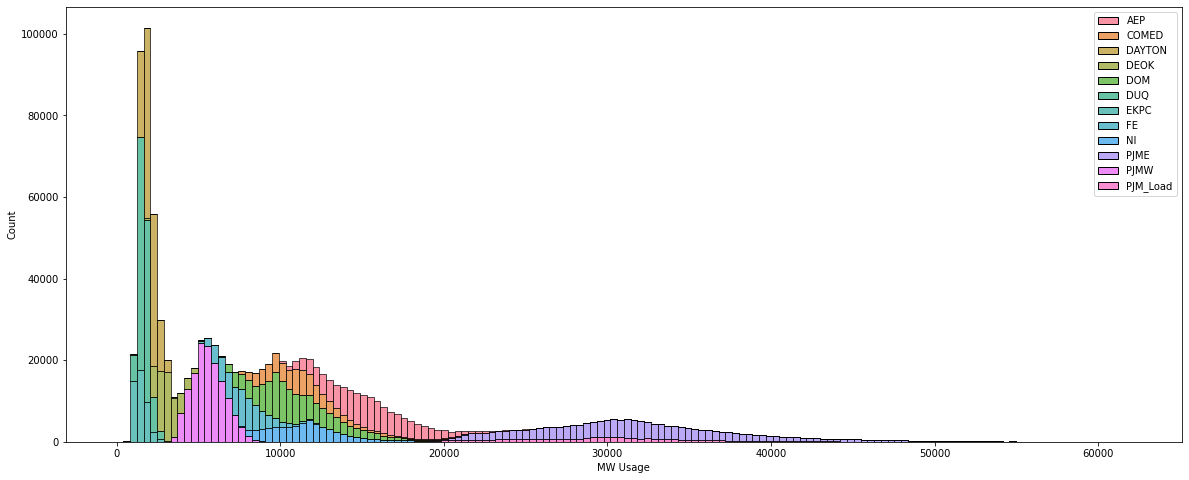

In [5]:
fig, ax = plt.subplots(figsize=(20,8))
sns.histplot(data=energy_df, bins=150, ax=ax, multiple='stack')
ax.set_xlabel("MW Usage")

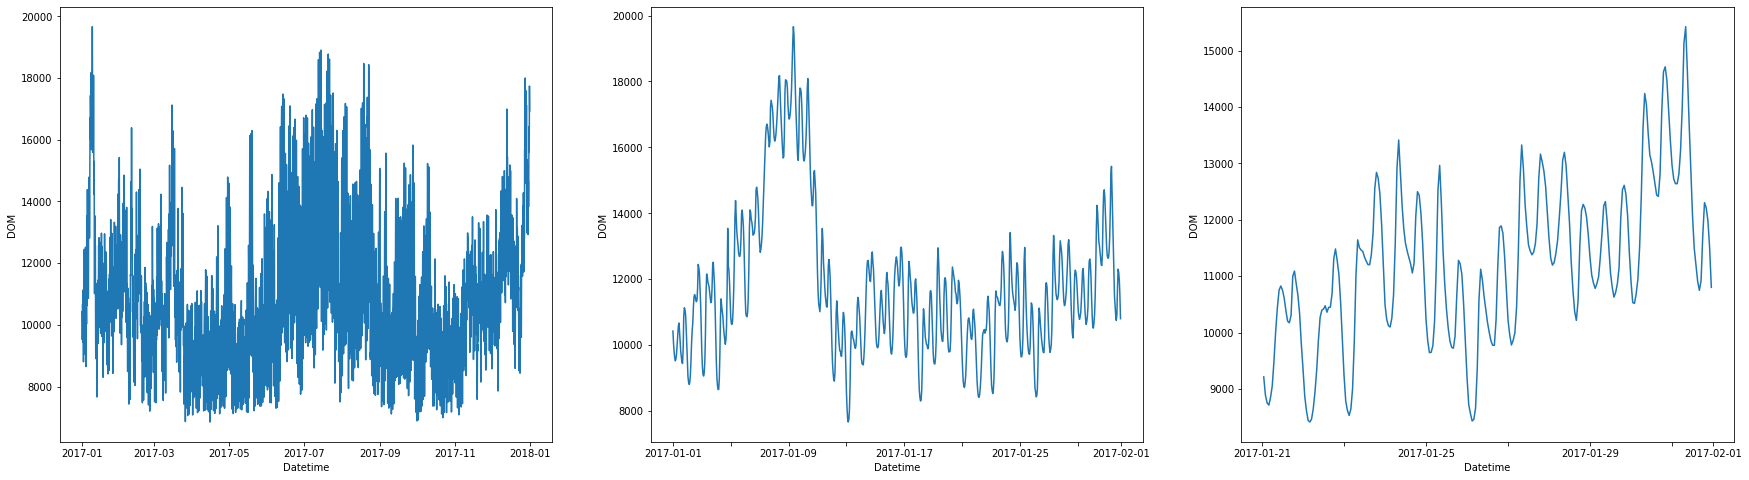

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30,8))
dom_energy = energy_df[['Datetime', 'DOM']]
mask = dom_energy['Datetime'].dt.year == int(2017)
dom_energy_2017 = dom_energy[mask]
mask = dom_energy_2017['Datetime'].dt.month == int(1)
dom_march_2017 = dom_energy_2017[mask]
#week_prior =  datetime(2017, 3, 24) - timedelta(days=1)
dom_ten_day = dom_march_2017[dom_march_2017['Datetime'] > datetime(2017, 1, 21)]
#dom_energy_2017.sample(20)
ax[0] = sns.lineplot(data=dom_energy_2017, x="Datetime", y="DOM", ax=ax[0])
ax[1] = sns.lineplot(data=dom_march_2017, x="Datetime", y="DOM", ax=ax[1])
for index, label in enumerate(ax[1].get_xticklabels()):
   if index % 2 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
ax[2] = sns.lineplot(data=dom_ten_day, x="Datetime", y="DOM", ax=ax[2])
for index, label in enumerate(ax[2].get_xticklabels()):
   if index % 2 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)

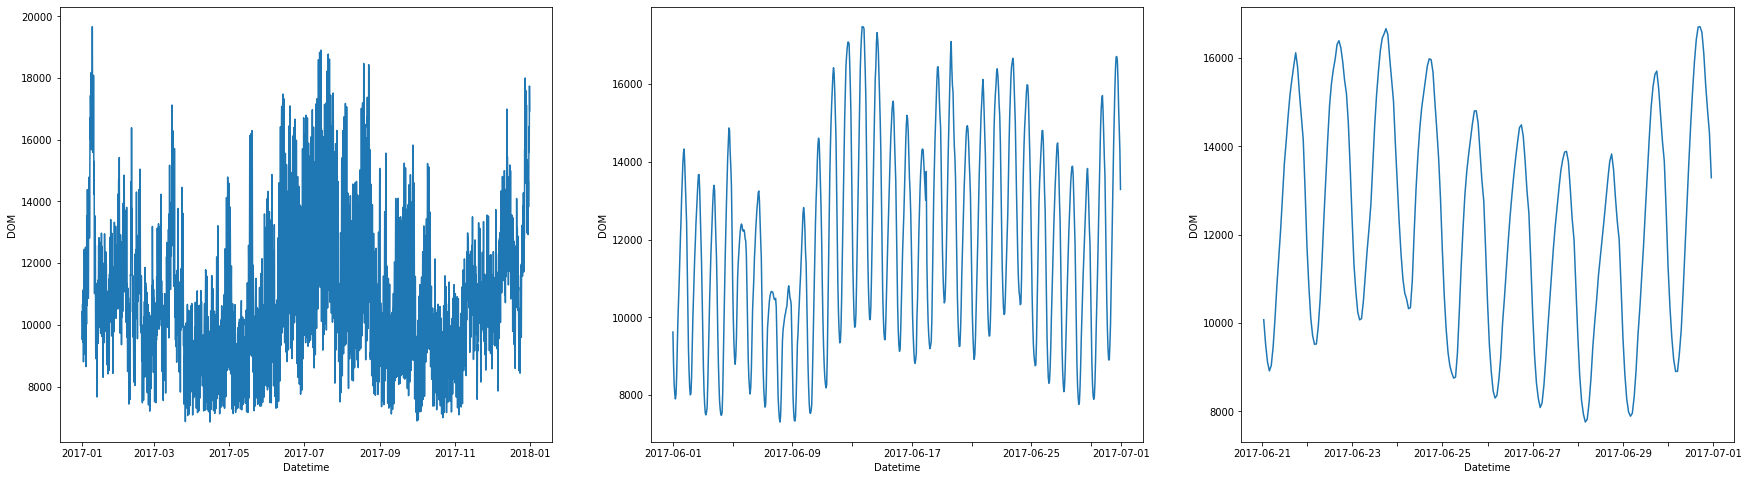

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30,8))
dom_energy = energy_df[['Datetime', 'DOM']]
mask = dom_energy['Datetime'].dt.year == int(2017)
dom_energy_2017 = dom_energy[mask]
mask = dom_energy_2017['Datetime'].dt.month == int(6)
dom_march_2017 = dom_energy_2017[mask]
#week_prior =  datetime(2017, 3, 24) - timedelta(days=1)
dom_ten_day = dom_march_2017[dom_march_2017['Datetime'] > datetime(2017, 6, 21)]
#dom_energy_2017.sample(20)
ax[0] = sns.lineplot(data=dom_energy_2017, x="Datetime", y="DOM", ax=ax[0])
ax[1] = sns.lineplot(data=dom_march_2017, x="Datetime", y="DOM", ax=ax[1])
for index, label in enumerate(ax[1].get_xticklabels()):
   if index % 2 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
ax[2] = sns.lineplot(data=dom_ten_day, x="Datetime", y="DOM", ax=ax[2])
for index, label in enumerate(ax[2].get_xticklabels()):
   if index % 2 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)

In [8]:
energy_df['dow'] = energy_df['Datetime'].dt.dayofweek
energy_df['doy'] = energy_df['Datetime'].dt.dayofyear
energy_df['year'] = energy_df['Datetime'].dt.year
energy_df['month'] = energy_df['Datetime'].dt.month
energy_df['quarter'] = energy_df['Datetime'].dt.quarter
energy_df['hour'] = energy_df['Datetime'].dt.hour
energy_df['weekday'] = energy_df['Datetime'].dt.day_name()
energy_df['woy'] = energy_df['Datetime'].dt.isocalendar().week
energy_df['dom'] = energy_df['Datetime'].dt.day # Day of Month
energy_df['date'] = energy_df['Datetime'].dt.date

In [9]:
energy_df.sample(20)

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,...,dow,doy,year,month,quarter,hour,weekday,woy,dom,date
99507,2009-05-26 03:00:00,10882.0,NaN,1443.0,NaN,7843.0,1371.0,NaN,NaN,7554.0,...,1,146,2009,5,2,3,Tuesday,22,26,2009-05-26
140676,2014-09-14 21:00:00,13401.0,9848.0,1760.0,2821.0,10488.0,1471.0,1325.0,7085.0,NaN,...,6,257,2014,9,3,21,Sunday,37,14,2014-09-14
165780,2017-11-03 21:00:00,13735.0,11177.0,1908.0,2806.0,10314.0,1454.0,1288.0,7389.0,NaN,...,4,307,2017,11,4,21,Friday,44,3,2017-11-03
129737,2013-12-13 01:00:00,17496.0,12245.0,2248.0,3347.0,13083.0,1706.0,2066.0,8465.0,NaN,...,4,347,2013,12,4,1,Friday,50,13,2013-12-13
73552,2006-05-12 10:00:00,15856.0,NaN,2139.0,NaN,9643.0,1682.0,NaN,NaN,11887.0,...,4,132,2006,5,2,10,Friday,19,12,2006-05-12
61595,2005-09-22 03:00:00,12519.0,NaN,1719.0,NaN,7864.0,1296.0,NaN,NaN,10403.0,...,3,265,2005,9,3,3,Thursday,38,22,2005-09-22
77647,2007-11-22 02:00:00,12045.0,NaN,1440.0,NaN,7278.0,1215.0,NaN,NaN,9777.0,...,3,326,2007,11,4,2,Thursday,47,22,2007-11-22
79202,2007-09-19 22:00:00,17992.0,NaN,2584.0,NaN,10874.0,1816.0,NaN,NaN,15823.0,...,2,262,2007,9,3,22,Wednesday,38,19,2007-09-19
109049,2010-04-24 20:00:00,13534.0,NaN,1627.0,NaN,8964.0,1429.0,NaN,NaN,9697.0,...,5,114,2010,4,2,20,Saturday,16,24,2010-04-24
92648,2008-03-07 07:00:00,18391.0,NaN,2400.0,NaN,11130.0,1653.0,NaN,NaN,11505.0,...,4,67,2008,3,1,7,Friday,10,7,2008-03-07


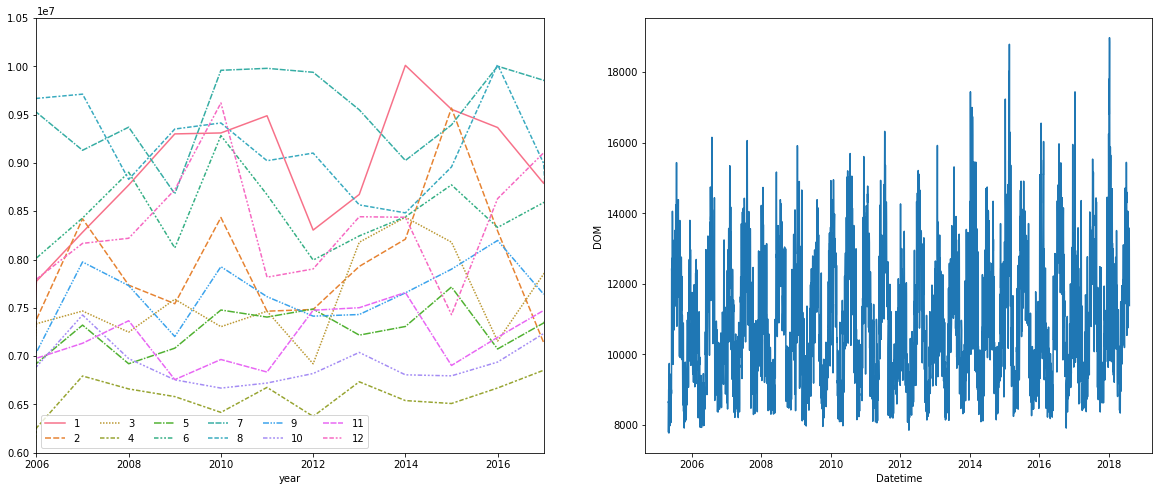

In [10]:
historic_DOM = energy_df[['DOM', 'year', 'month']]
#historic_DOM.index.value_counts()
historic_DOM_wide = historic_DOM.reset_index().pivot_table(values='DOM', index='year', columns=['month'], aggfunc=np.sum)
historic_DOM_wide.head(20)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax[0] = sns.lineplot(data=historic_DOM_wide, ax=ax[0])
ax[0].set_xlim([2006,2017])
ax[0].set_ylim([6000000, 10500000])
ax[0].legend(loc="lower left", ncol=6)
# Resample to daily precip sum and save as new dataframe
energy_df_daily = energy_df.set_index('Datetime').resample('D').mean()
ax[1] = sns.lineplot(data=energy_df_daily, x="Datetime", y="DOM", ax=ax[1])

In [11]:
energy_df_daily['DOM'].count()

4843

Train on 4000 samples, test on the rest.

In [12]:
#selected_rows = df[~df['Age'].isna()]
dom_train = energy_df_daily[~energy_df_daily['DOM'].isna()]
time_based_feats = ['dow', 'doy', 'year', 'month', 'quarter', 'hour']
target = ['DOM']
dom_y = dom_train[target]
dom_X = dom_train[time_based_feats]

In [13]:
X_train = dom_X.iloc[:4000, :]
X_test = dom_X.iloc[4000:, :]
y_train = dom_y.iloc[:4000, :]
y_test = dom_y.iloc[4000:, :]

Baseline XGB regression model

In [14]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[06:26:59] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:10915.36345	validation_1-rmse:11293.63050
[100]	validation_0-rmse:4163.06505	validation_1-rmse:4570.70343
[200]	validation_0-rmse:1873.05951	validation_1-rmse:2302.44940
[300]	validation_0-rmse:1252.24034	validation_1-rmse:1687.32130
[400]	validation_0-rmse:1121.91471	validation_1-rmse:1596.76930
[500]	validation_0-rmse:1089.44346	validation_1-rmse:1577.13483
[530]	validation_0-rmse:1083.51338	validation_1-rmse:1583.03681


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [15]:
predictions = reg.predict(X_test)

In [16]:
predictions.shape

(843,)

In [17]:
pd.DataFrame(predictions)

,0
0,9483.933594
1,9483.933594
2,9343.198242
3,8930.720703
4,8977.180664
...,...
838,12566.738281
839,12539.527344
840,12539.527344
841,12539.527344


In [18]:
df_predvtruth = pd.concat([y_test, pd.DataFrame(predictions, index=y_test.index)], axis=1)

RMSE Score on Test set: 1574.531


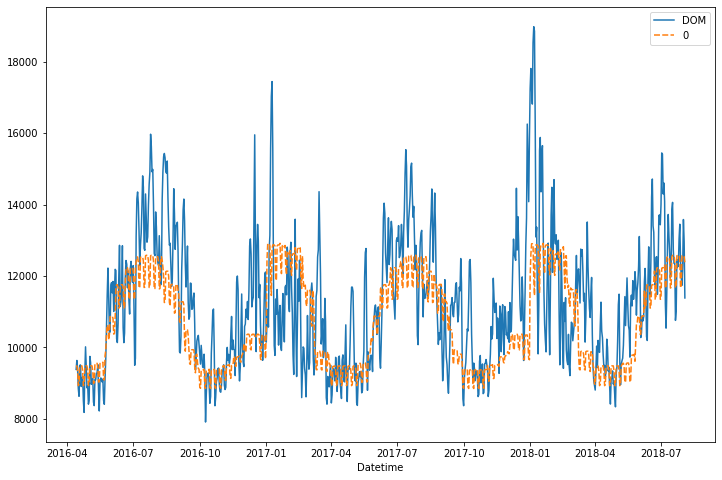

In [19]:
fig, ax = plt.subplots(1,1,figsize=(12, 8))
sns.lineplot(data=df_predvtruth, ax=ax)
score = mean_squared_error(y_test, predictions, squared=False)
print(f'RMSE Score on Test set: {score:0.3f}')

Optimising XGB regressor model with a RandomisedGridSearch (takes a while to run on Kaggle)

In [20]:
# from sklearn.model_selection import RandomizedSearchCV
# # Define the grid of hyperparameters to search
# hyperparameter_grid = {
#     'n_estimators': [100, 500, 900, 1100, 1500],
#     'max_depth': [2, 3, 5, 10, 15],
#     'learning_rate': [0.05, 0.1, 0.15, 0.20],
#     'min_child_weight': [1, 2, 3, 4]
#     }

# xgbr = xgb.XGBRegressor(random_state=1)

# # Set up the random search with 4-fold cross validation
# random_cv = RandomizedSearchCV(estimator=xgbr,
#             param_distributions=hyperparameter_grid,
#             cv=5, n_iter=400,
#             scoring = 'neg_root_mean_squared_error',n_jobs = 4,
#             verbose = 5, 
#             return_train_score = True,
#             random_state=42)

# random_cv.fit(X_train,y_train)

# random_cv.best_estimator_

In [21]:
best_xgb = xgb.XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1)

[0]	validation_0-rmse:10483.50990	validation_1-rmse:10858.58103
[99]	validation_0-rmse:1158.09068	validation_1-rmse:1493.64898
RMSE Score on Test set: 1493.649


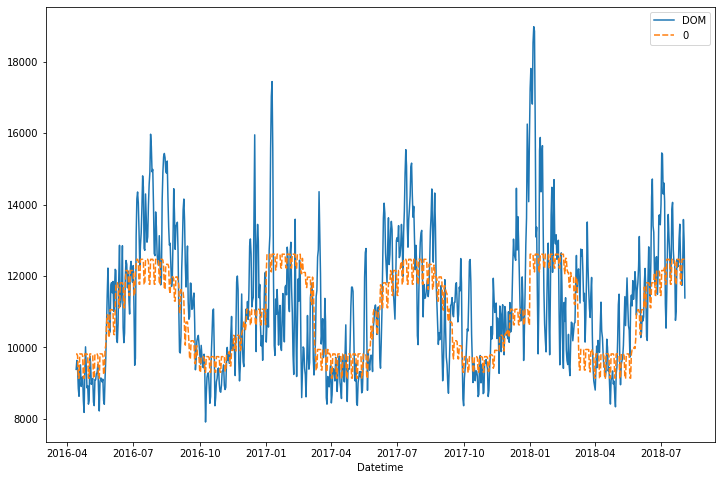

In [22]:
#best_xgb = random_cv.best_estimator_
best_xgb.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)
predictions = best_xgb.predict(X_test)
df_predvtruth = pd.concat([y_test, pd.DataFrame(predictions, index=y_test.index)], axis=1)
fig, ax = plt.subplots(1,1,figsize=(12, 8))
sns.lineplot(data=df_predvtruth, ax=ax)
score = mean_squared_error(y_test, predictions, squared=False)
print(f'RMSE Score on Test set: {score:0.3f}')